In [1]:
%pip install pandas matplotlib neurokit2
%pip install neurokit2 --upgrade



Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 24.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 24.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


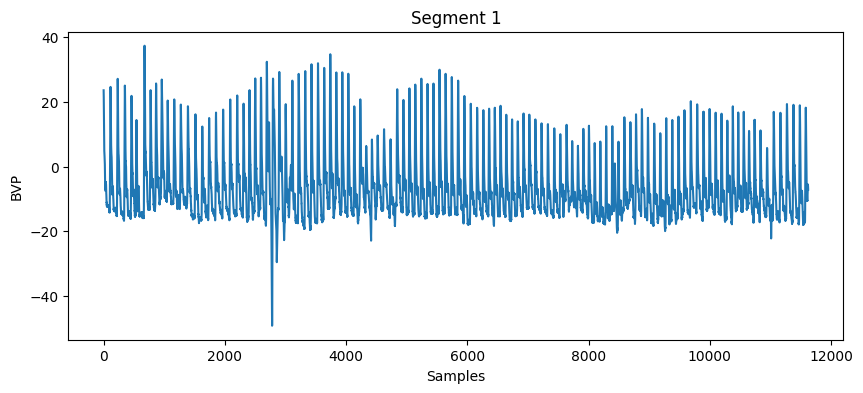

KeyError: '0.04_0.15_Hz'

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import neurokit2 as nk
import numpy as np

# Load the CSV file
file_path = 'C:/Users/thisi/OneDrive/共有ファイル/生体情報データ/SC_BVP_test2.csv'
data = pd.read_csv(file_path, usecols=[1, 3, 4])  # Columns B, D, E are indices 1, 3, 4

# Extract relevant columns
time = data.iloc[1:, 0].astype(float).values  # Column B, skip header
bvp = data.iloc[1:, 1].astype(float).values  # Column D, skip header
markers = data.iloc[1:, 2].values  # Column E, skip header

# Identify marker positions
marker_indices = [i for i, marker in enumerate(markers) if isinstance(marker, str) and marker.startswith('Marker:')]

# Split BVP data based on markers
segments = []
start_idx = 0

for idx in marker_indices:
    segments.append(bvp[start_idx:idx])
    start_idx = idx

# Add the last segment
segments.append(bvp[start_idx:])

# Visualize each segment and calculate LF/HF ratio
results = []

for i, segment in enumerate(segments):
    # Visualize the segment
    plt.figure(figsize=(10, 4))
    plt.plot(segment)
    plt.title(f'Segment {i+1}')
    plt.xlabel('Samples')
    plt.ylabel('BVP')
    plt.show()

    # Calculate LF/HF ratio using nk.signal_power
    power = nk.signal_power(segment, sampling_rate=120, normalize=True, frequency_band=[(0.04, 0.15), (0.15, 0.40)])
    lf = power['0.04_0.15_Hz']
    hf = power['0.15_0.40_Hz']
    lf_hf_ratio = lf / hf if hf != 0 else np.nan

    results.append({'Segment': i+1, 'LF/HF Ratio': lf_hf_ratio})

# Output the results to a CSV file
results_df = pd.DataFrame(results)
results_df.to_csv('bvp_analysis_results.csv', index=False)
